# Ford GoBike Data Visualization

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
#reading the dataset and displaying few rows
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


## Investigating Dataset

>**AIM**  <br>
   <pre>-Number of Rows and Columns in Dataset.</pre>
   <pre>-Data type of each column.</pre>
   <pre>-Number of Null values in each Columns.</pre>
   <pre>-Duplication if any.</pre>
   <pre>-Descriptive statistics for numeric variables.</pre>


In [58]:
#Number of Rows and Columns in Dataset.
df.shape

(183412, 16)

In [59]:
#Data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [60]:
#Number of Null values in each Columns
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [61]:
#Total number of Null values.
df.isnull().sum().sum()

17318

In [62]:
#Duplication if any.
df.duplicated().sum()

0

In [63]:
#Descriptive statistics for numeric variables.
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


>**Observation**  <br>
   <pre>-Number of Rows are 183412 and Columns are 16.</pre>
   **<pre>-*Few Columns have inappropriate dtype which must be changed.*</pre>**
   **<pre>-*It is observed that there are 17318 null values which must be fixed.* </pre>**
   <pre>-No Duplication.</pre>


## Data Cleaning

In [64]:
# Droping all null values 
df.dropna(inplace=True)
# Re-checking for null values
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [65]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [66]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [67]:
#Fixing Data Types of Columns
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])
df['member_birth_year'] =df['member_birth_year'].astype('int')
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] =df['bike_id'].astype('str')

In [68]:
#Confirming the change in data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [69]:
#For better Understanding and Visualisation, further dividing start time
df['start_hour'] = df.start_time.dt.strftime('%H')
df['start_day'] = df.start_time.dt.strftime('%A')
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_month'] = df.start_time.dt.strftime('%B')

In [70]:
# Creating duration_min column
df['duration_min']=df['duration_sec']/60

In [71]:
# Create new column for age from member_birth_year column
df['member_age'] = 2021 - df['member_birth_year']
# Change member_age into integer
df.member_age = df.member_age.astype(int)

In [72]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_date,start_month,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,17,Thursday,2019-02-28,February,869.750000,37
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,12,Thursday,2019-02-28,February,1030.900000,49
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,17,Thursday,2019-02-28,February,608.166667,32
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,23,Thursday,2019-02-28,February,26.416667,47
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,23,Thursday,2019-02-28,February,29.883333,62


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [74]:
df.shape

(174952, 22)

>**Observation**  <br>
   **<pre>-Initially, number of Rows were 183412 and Columns were 16. After Data Cleaning we have 22 Columns and 174952 Rows.</pre>**
   **<pre>-*Proper Data type is assigned to each column for futher visualisation.*</pre>**
   **<pre>-*There is no null value in our dataframe.* </pre>**
   **<pre>-No Duplication.</pre>**


## Data Visualisation

> ### Main features/Point of Interest of Dataset are:

>     - Most common start and end stations
    - Gender
    - Different Age groups
    - Riding Durations and distance travelled
    

### *- Most common start and end stations*

In [75]:
#Most common Stating point
df.start_station_name.value_counts()[0:5]

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

In [76]:
#Most Common Ending points
df.end_station_name.value_counts()[0:5]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end_station_name, dtype: int64

### *- Exploring Gender Features*

In [77]:
# 1. Getting Unique Values under Gender Column
gender_unique = df.member_gender.nunique()
print("Number of unique values are: ",gender_unique)
gender_unique = df.member_gender.unique()
print("Genders are classified as: ",gender_unique)

Number of unique values are:  3
Genders are classified as:  ['Male' 'Other' 'Female']


In [78]:
# 2. Getting count of each gender type customer
count_gender = df.member_gender.value_counts()
count_gender

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [79]:
total_gender = count_gender.sum()
for i in range(count_gender.shape[0]):
    print("Percentage of ", count_gender.index[i], " is ","{:0.1f}%".format((count_gender[i]/total_gender)*100))

Percentage of  Male  is  74.6%
Percentage of  Female  is  23.3%
Percentage of  Other  is  2.1%


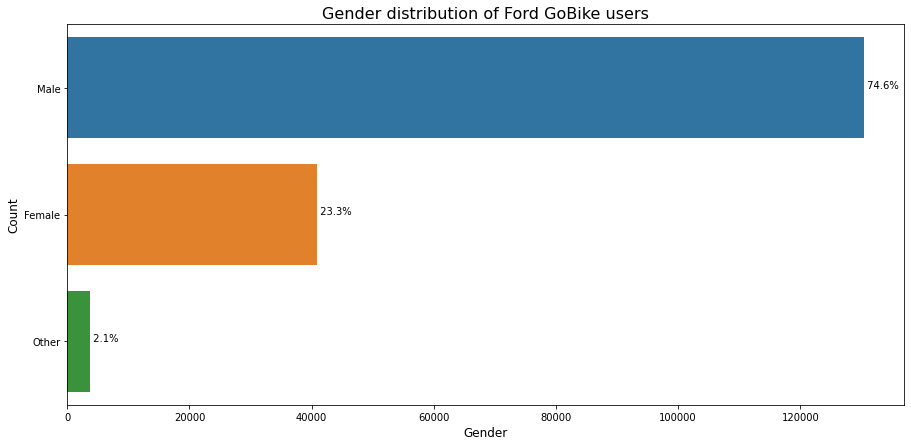

In [80]:
# 3. Visualizing Gender Distribution using bar graph
plt.figure(figsize=(15,7))
sns.countplot(data = df, y='member_gender', order = count_gender.index);
plt.title("Gender distribution of Ford GoBike users", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12);

for i in range(count_gender.shape[0]):
#     print("Percentage of ", count_gender.index[i], " is ","{:0.1f}%".format((count_gender[i]/count_gender.sum())*100))
    plt.text(count_gender[i], i, " {:0.1f}%".format((count_gender[i]/count_gender.sum())*100))

>**Observation**  <br>
   **<pre>-Graph clearly shows that Male users are more as compared to others catagory, followed by female and then other</pre>**
   **<ol>
    <li>Male - 74.6% </li>
    <li>Female - 23.3% </li>
    <li>Other - 2.1% </li>
    </ol>**



### *- Exploring Age Features*

In [81]:
# 1. Statstical Analysis
print("Minimum Age: ",df.member_age.min())
print("Maximum Age: ",df.member_age.max())
print("Average/Mean Age: {:.2f}".format(df.member_age.mean()))

Minimum Age:  20
Maximum Age:  143
Average/Mean Age: 36.20


In [82]:
# 2. For better accuracy and wide range
bins = np.arange(0, df['member_age'].max()+3, 5)
bins

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145])

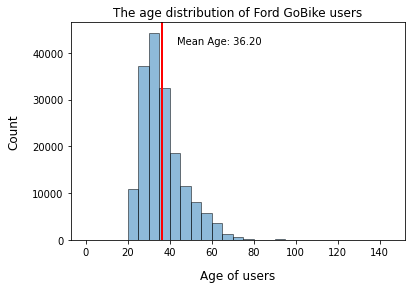

In [83]:
# 3. Age of users vs Count histogram
plt.hist(data = df, x = 'member_age', bins = bins, edgecolor='k', alpha=0.5);
plt.axvline(df['member_age'].mean(), color='r', linestyle='solid', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(df['member_age'].mean()*1.2, max_ylim*0.9, 'Mean Age: {:.2f}'.format(df['member_age'].mean()))
plt.title("The age distribution of Ford GoBike users", fontsize=12, y=1);
plt.xlabel("Age of users", fontsize=12, labelpad=12);
plt.ylabel("Count", fontsize=12, labelpad=12);


<ul>
<li>Outliers can be seen on this plot.
</ul>

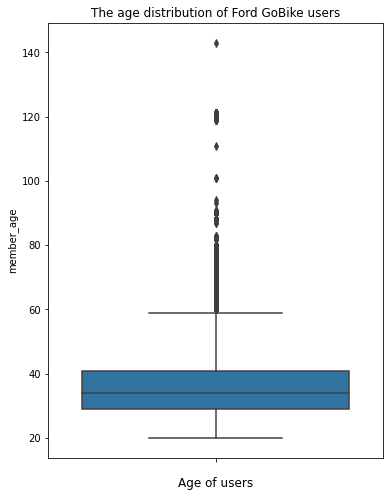

In [84]:
# 4. For better clearity of Outliers, we can use boxplot
plt.figure(figsize=(6,8))
sns.boxplot(y='member_age', data=df);
plt.title("The age distribution of Ford GoBike users", fontsize=12, y=1);
plt.xlabel("Age of users", fontsize=12, labelpad=12);

> <ul>
    <li>As per the plot, there are outliers which must be removed.</li>
    <li>It is observed that outliers starts just little short to age of 60 till 143.</li>

In [85]:
# 5. Trying to find range with clean data
test = df.query('member_age <=54')
test.member_age.describe()

count    163341.000000
mean         34.409787
std           7.590812
min          20.000000
25%          29.000000
50%          33.000000
75%          39.000000
max          54.000000
Name: member_age, dtype: float64

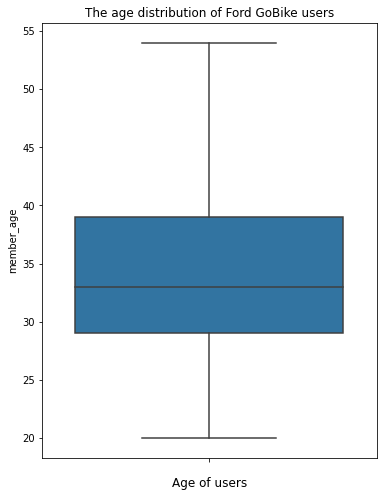

In [86]:
# 6. Testing whether dataset is outliers free or not.
plt.figure(figsize=(6,8))
sns.boxplot(y='member_age', data=test);
plt.title("The age distribution of Ford GoBike users", fontsize=12, y=1);
plt.xlabel("Age of users", fontsize=12, labelpad=12);

In [87]:
# 7. Removing age Greater than 54 & updating our dataframe
df = test

In [88]:
df.shape

(163341, 22)

In [89]:
# 8. Types of Users
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

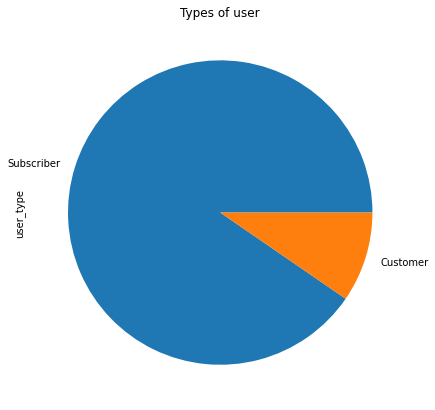

In [90]:
# 9. Pie chart showing relation between Subscriber and Customer
plt.figure(figsize=(7,7))
df.user_type.value_counts().plot(kind='pie')
plt.title('Types of user');

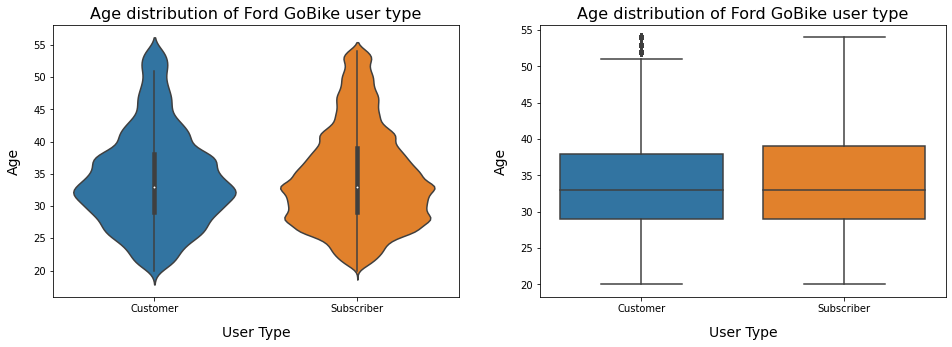

In [91]:
# 10. Exploring user_type vs member_age
plt.figure(figsize = [16, 5])

# LEFT plot: violin plot
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1)
#Let's return the axes object
sns.violinplot(data=df, x='user_type', y='member_age', innner='quartile')
plt.xticks();
plt.title("Age distribution of Ford GoBike user type", fontsize=16, y=1)
plt.xlabel("User Type", fontsize=14, labelpad=12);
plt.ylabel("Age", fontsize=14, labelpad=12);

# RIGHT plot: box plot
# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2)
graph = sns.boxplot(data=df, x='user_type', y='member_age')
plt.xticks();
plt.ylim(graph.get_ylim())
plt.title("Age distribution of Ford GoBike user type", fontsize=16, y=1)
plt.xlabel("User Type", fontsize=14, labelpad=12);
plt.ylabel("Age", fontsize=14, labelpad=12);

>**Observation**  <br>
   **<pre>-Ford GoBike has users from the age of 20 to the age of 143</pre>**
   **<pre>-Due to outliers there was variation in observation, so outliers were removed for good quality of data</pre>**
   **<pre>-Count of Subscribers users are more as compared to Customer users under the age of 55</pre>**
   



### *- Riding Durations and distance travelled*

In [92]:
# 1. Count for start_day 
df['start_day'].value_counts()

Thursday     31405
Tuesday      28589
Wednesday    26567
Friday       25773
Monday       23933
Sunday       13613
Saturday     13461
Name: start_day, dtype: int64

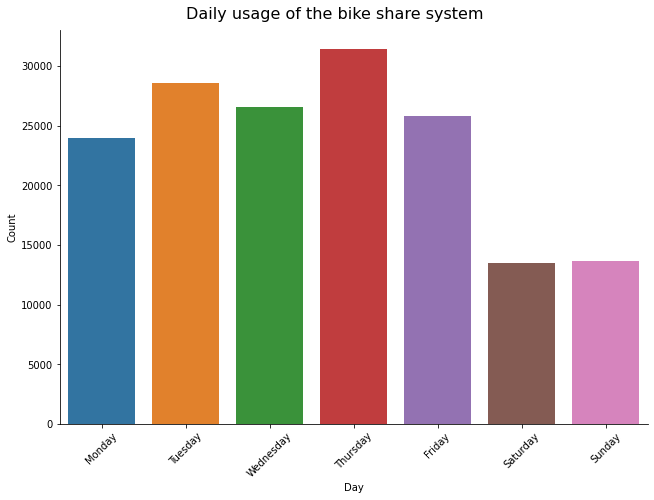

In [93]:
# 2. Exploring daily usege of the bike sharing system
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
ax = sns.catplot(data=df, x='start_day', kind='count', order=days_order, height=6, aspect=12/8)
plt.xticks(rotation=45);
ax.set_axis_labels("Day", "Count")
ax.fig.suptitle('Daily usage of the bike share system', y=1.03, fontsize=16);

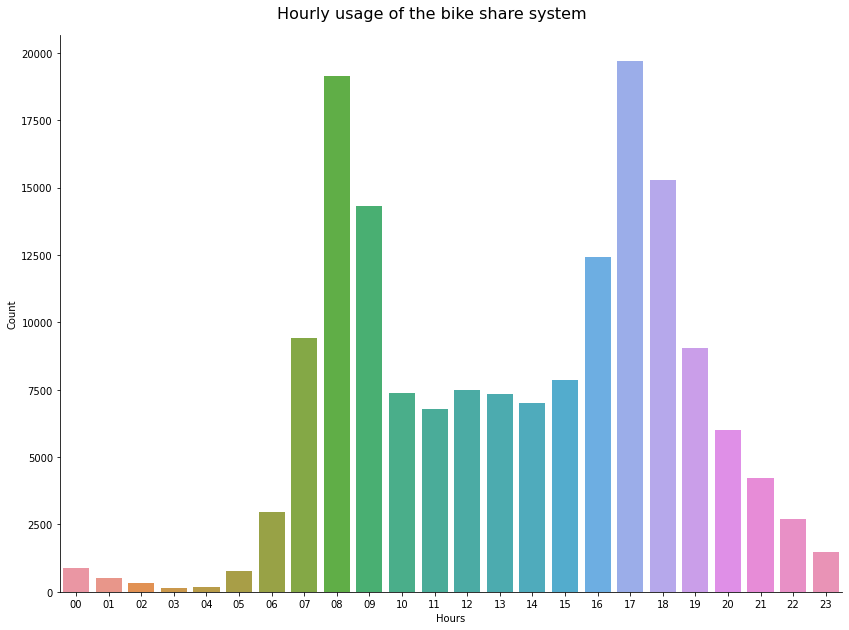

In [94]:
# 3. Houtly usage of the bike
hour = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
gp = sns.catplot(data=df, x='start_hour', kind='count',  order=hour, height=8.27, aspect=11.7/8.27)
gp.set_axis_labels("Hours", "Count")
gp.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=16);

c:\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


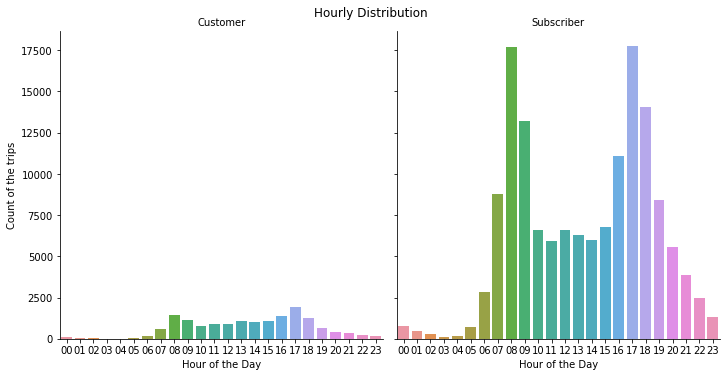

In [95]:
# 4. Hourly usage of Customer and Subscriber
hour = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
plot2 = sns.factorplot(data = df, x = "start_hour", col = "user_type", 
               kind = "count", order=hour)
plot2.fig.suptitle("Hourly Distribution", y = 1)
plot2.set_axis_labels("Hour of the Day", "Count of the trips")
plot2.set_titles("{col_name}");

#### Hourly usage of the bike share system by two groups

In [96]:
# 5. Creating function for avoiding repetition of the code
def heatMap(x):
    df2 = df[df.user_type == x].groupby(["start_hour", "start_day"]).bike_id.size().reset_index()
    
    df2 = df2.pivot("start_hour", "start_day",'bike_id')
    
    sns.heatmap(df2, cmap="rainbow")
    plt.title(x, y=1)
    plt.xlabel('Days of the week')
    plt.ylabel('Starting time in hour')

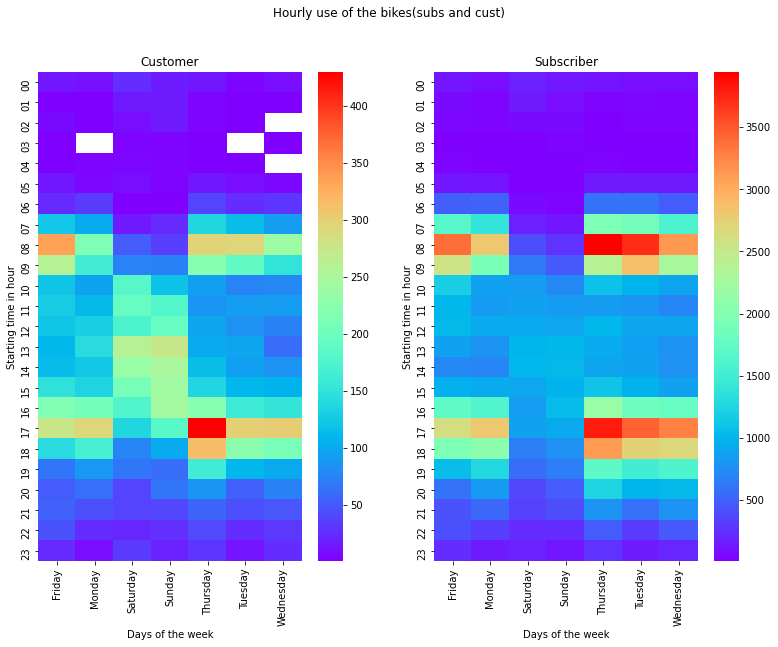

In [97]:
# 6. By using the above function we avoid the repetition of code
plt.figure(figsize=(13,9))
plt.suptitle('Hourly use of the bikes(subs and cust)')
plt.subplot(1, 2, 1)
heatMap('Customer') #using the function 
plt.subplot(1, 2, 2)
heatMap('Subscriber')#using the function

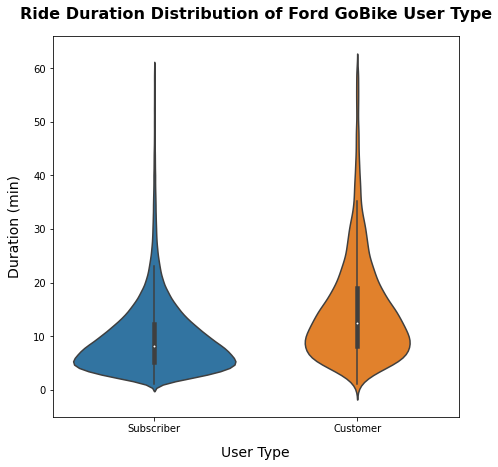

In [98]:
# 7. Exploring ride duration for each user type (limiting the duration to 60 minutes for visualization)
plt.figure(figsize = [16, 7])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
graph = sns.violinplot(data=df.query("duration_min <= 60"), x='user_type', y='duration_min');
plt.xticks();
plt.ylim(graph.get_ylim());
plt.xlabel('User Type', fontsize=14, labelpad=12);
plt.ylabel('Duration (min)', fontsize=14, labelpad=12);
plt.title('Ride Duration Distribution of Ford GoBike User Type', y=1.03, fontsize=16, fontweight='bold');

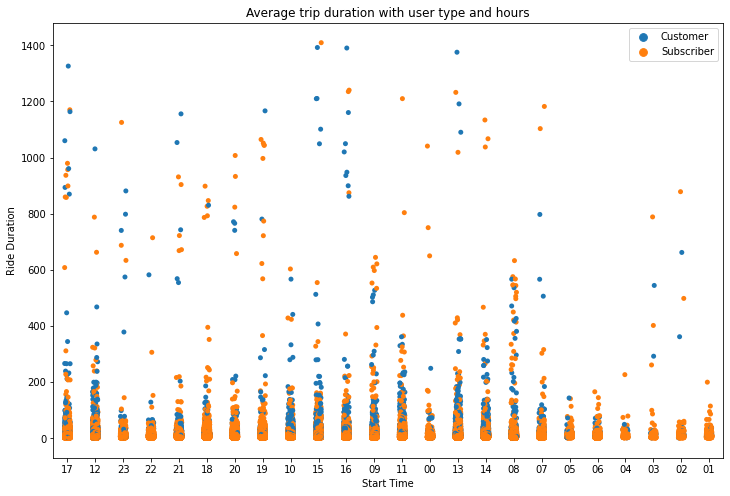

In [99]:
# 8. using stripplot for calculating average trip duration with user-type and hours
plt.figure(figsize=(12,8))
sns.stripplot(data=df, x='start_hour', y='duration_min', hue='user_type')
plt.title('Average trip duration with user type and hours')
plt.xlabel('Start Time')
plt.ylabel('Ride Duration')
plt.legend()
plt.show()

>**Observation**  <br>
   **<pre>-On Thrusday, Ford GoBike has large number of users.</pre>**
   **<pre>-Also it is observed that at 1700Hr more demand for GoBike.</pre>**
   **<pre>-We can conclude that the number of trips varies according to the time as well as the day of the week.</pre>**
   **<pre>-Customer users have a high travel duration from 20-60 min comapred to subscriber users.</pre>**
   **<pre>-Subscriber users have a low travel duration less than 10 min compared to customer users.</pre>**
   